In [81]:
# !pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.2 MB/s eta 0:00:00


In [2]:
import os
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [163]:
!ls ./../../data/kidney_stone_pred

kindey stone urine analysis.csv test.csv
sample_submission.csv           train.csv


In [6]:
### Data Preparation and EDA

In [165]:
train_df=pd.read_csv('./../../data/kidney_stone_pred/train.csv')
test_df=pd.read_csv('./../../data/kidney_stone_pred/test.csv')
extra_df=pd.read_csv('./../../data/kidney_stone_pred/kindey stone urine analysis.csv')

In [166]:
print(train_df.head())
print(extra_df.head())

   id  gravity    ph  osmo  cond  urea  calc  target
0   0    1.013  6.19   443  14.8   124  1.45       0
1   1    1.025  5.40   703  23.6   394  4.18       0
2   2    1.009  6.13   371  24.5   159  9.04       0
3   3    1.021  4.91   442  20.8   398  6.63       1
4   4    1.021  5.53   874  17.8   385  2.21       1
   gravity    ph  osmo  cond  urea  calc  target
0    1.021  4.91   725  14.0   443  2.45       0
1    1.017  5.74   577  20.0   296  4.49       0
2    1.008  7.20   321  14.9   101  2.36       0
3    1.011  5.51   408  12.6   224  2.15       0
4    1.005  6.52   187   7.5    91  1.16       0


In [11]:
print(train_df.columns)

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')


In [12]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
None


In [13]:
test_df.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [14]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB
None


In [167]:
print(train_df.shape)
print(test_df.shape)
print(extra_df.shape)

(414, 8)
(276, 7)
(79, 7)


In [23]:
print(train_df.isna().sum())
print(test_df.isna().sum())

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64
id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64


In [169]:
print(train_df['target'].value_counts())
print(extra_df['target'].value_counts())

target
0    230
1    184
Name: count, dtype: int64
target
0    45
1    34
Name: count, dtype: int64


In [7]:
### Plots

In [25]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

<Axes: >

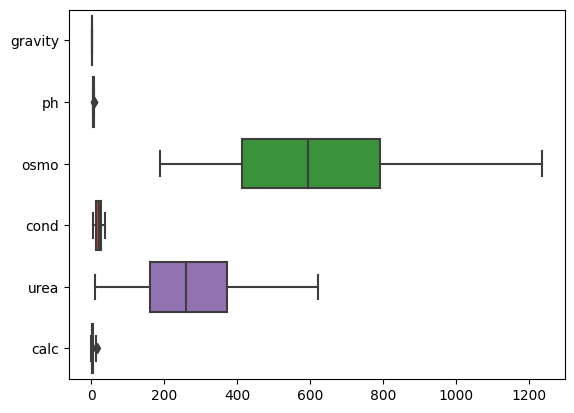

In [170]:
sns.boxplot(data=extra_df[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']], orient="h")

In [188]:
# sns.boxplot(data=extra_df[['gravity']], orient="h")
# sns.boxplot(data=extra_df[['ph']], orient="h")
# sns.boxplot(data=extra_df[['cond']], orient="h")
# sns.boxplot(data=extra_df[['calc']], orient="h")

<Axes: >

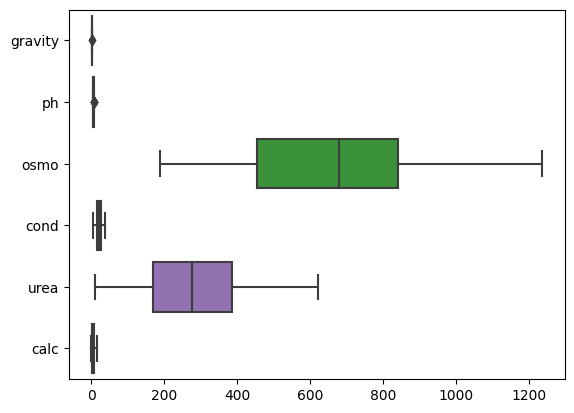

In [177]:
sns.boxplot(data=train_df[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']], orient="h")

In [194]:
# sns.boxplot(data=train_df[['gravity']], orient="h")
# sns.boxplot(data=train_df[['ph']], orient="h")
# sns.boxplot(data=train_df[['osmo']], orient="h")
# sns.boxplot(data=train_df[['cond']], orient="h")
# sns.boxplot(data=train_df[['urea']], orient="h")
# sns.boxplot(data=train_df[['calc']], orient="h")

In [189]:
#### Remove outliers
from scipy import stats
train_df = train_df[(np.abs(stats.zscore(train_df)) < 3).all(axis=1)]

<Axes: >

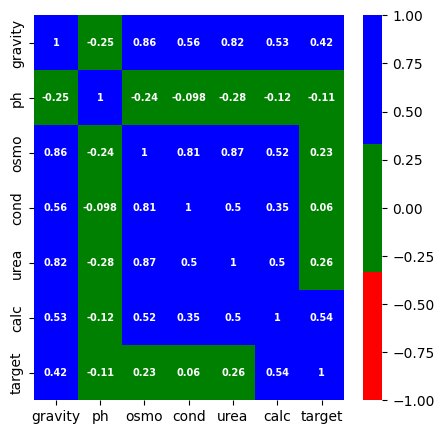

In [196]:
#### Extra Data
corr = extra_df.corr()

plt.figure(figsize=(5, 5)) # Make the heatmap larger 
sns.heatmap(corr, cmap = ["red", "green", "blue"], vmin = -1, vmax = 1, annot = True, 
            annot_kws = {'fontsize':7, 'fontweight':'bold'}
           )

<Axes: >

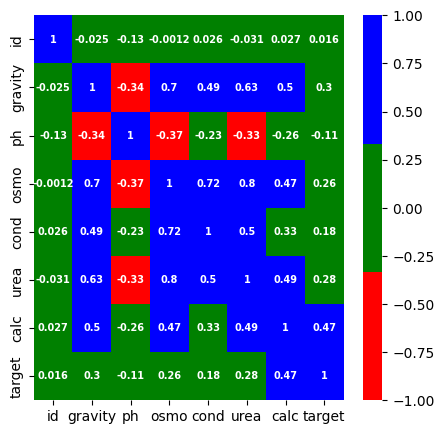

In [197]:
#### Train Data
corr = train_df.corr()

plt.figure(figsize=(5, 5)) # Make the heatmap larger 
sns.heatmap(corr, cmap = ["red", "green", "blue"], vmin = -1, vmax = 1, annot = True, 
            annot_kws = {'fontsize':7, 'fontweight':'bold'}
           )

In [14]:
### Data Split

In [344]:
X1 = train_df[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]
X2 = extra_df[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]
X = pd.concat([X1, X2], axis=0)
Y1 = train_df['target']
Y2 = extra_df['target']
Y = pd.concat([Y1, Y2], axis=0)


In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [366]:
####### Model Training

In [367]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [368]:
### Functions

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    
    print("Train Confusion Matrix:") 
    cm_train = confusion_matrix(y_train, dt_classifier.predict(X_train), labels=dt_classifier.classes_)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=dt_classifier.classes_)
    disp_train.plot()
    plt.show()
    
    print("-"*50)
    
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    
    print("Test Confusion Matrix:")
    cm_test = confusion_matrix(y_test, dt_classifier.predict(X_test), labels=dt_classifier.classes_)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=dt_classifier.classes_)
    disp_test.plot()
    plt.show()
    
#### Visualise Decision Tree 
# Putting the feature names and class names into variables
fn = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']
cn = ['0', '1']

def show_tree(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names= fn,
                       class_names=cn,
                       filled=True)



In [369]:
### Decision Tree

Train Accuracy : 0.7885117493472585
Train Confusion Matrix:


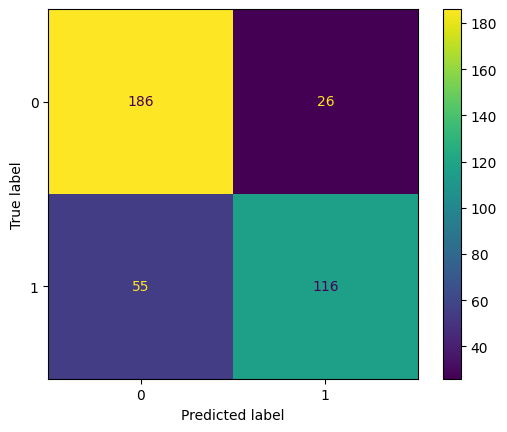

--------------------------------------------------
Test Accuracy : 0.71875
Test Confusion Matrix:


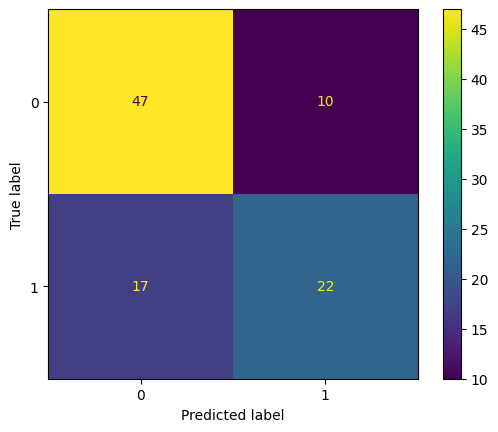


 Scores of Cross Validations : [0.74358974 0.76923077 0.74358974 0.71052632 0.86842105 0.86842105
 0.73684211 0.65789474 0.57894737 0.78947368]

 Mean accuracy = 0.75 accuracy and Standard deviation = 0.08


In [370]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3,random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
scores = cross_val_score(clf, X_train,y_train, cv=10)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
evaluate_model(clf)

print(f'\n Scores of Cross Validations : {scores}')
print("\n Mean accuracy = %0.2f accuracy and Standard deviation = %0.2f" % (scores.mean(), scores.std()))


In [382]:
#Hyper-parameter tuning
from scipy.stats import randint

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


clf_grid = DecisionTreeClassifier()
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [i for i in range(1,10)],
    'min_samples_leaf': [i for i in range(1,10)],
    'min_samples_split': [i for i in range(1,10)],
    'criterion': ["gini", "entropy"]
}
param_rand = {"max_depth": [3, None],
              "max_features": randint(1,6),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
# Instantiate the grid search model
# grid_search = GridSearchCV(estimator=clf_grid, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

random_search = RandomizedSearchCV(clf_grid,param_rand, cv=5, scoring = "accuracy")

In [383]:
%%time
# grid_search.fit(X_train, y_train)

random_search.fit(X_train, y_train)

CPU times: user 218 ms, sys: 4.85 ms, total: 223 ms
Wall time: 223 ms


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7faf463a07c0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7faf3f1fe1f0>},
                   scoring='accuracy')

In [384]:
print("Tuned Decision Tree Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 6}
Best score is 0.7569377990430622


Train Accuracy : 0.783289817232376
Train Confusion Matrix:


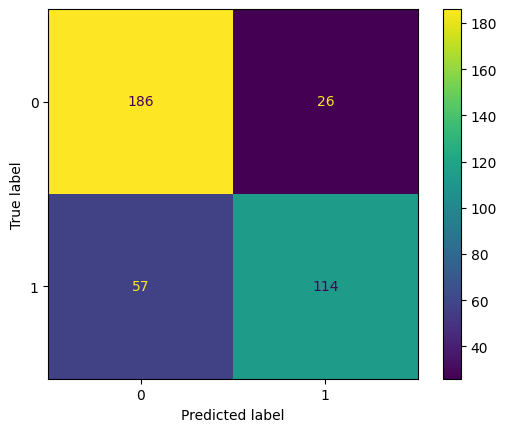

--------------------------------------------------
Test Accuracy : 0.7291666666666666
Test Confusion Matrix:


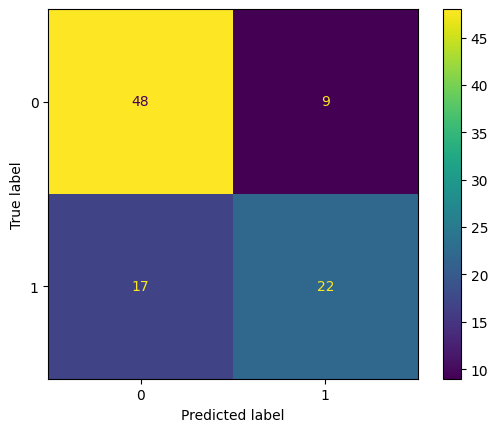

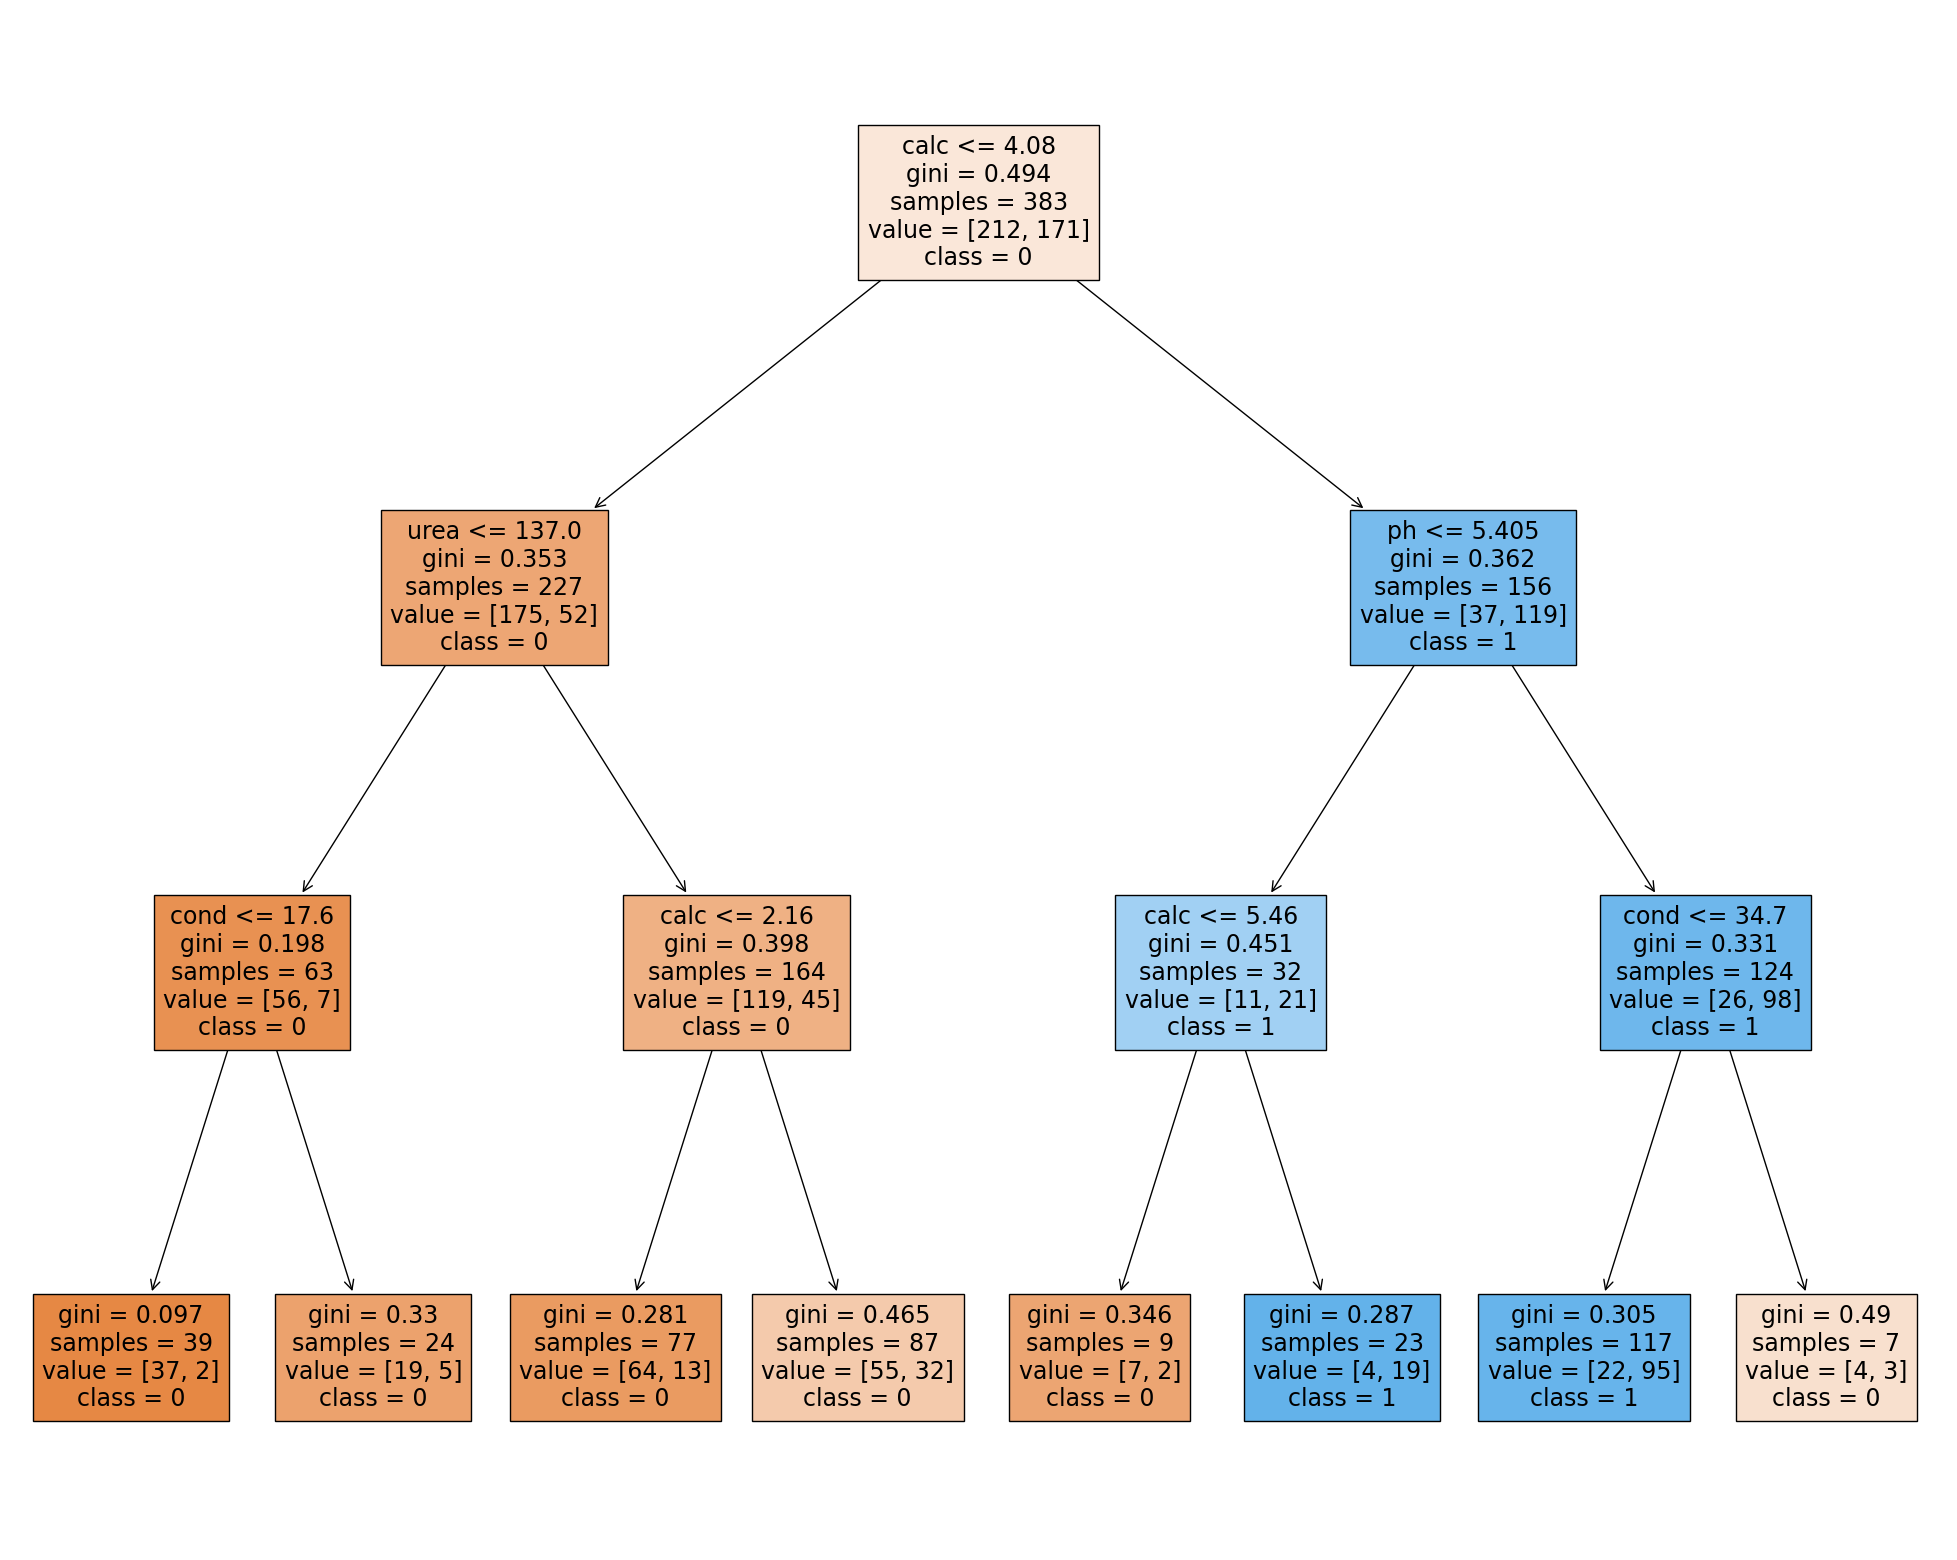

In [385]:
dt_best = random_search.best_estimator_
evaluate_model(dt_best)
show_tree(dt_best)

Train Accuracy : 0.9947780678851175
Train Confusion Matrix:


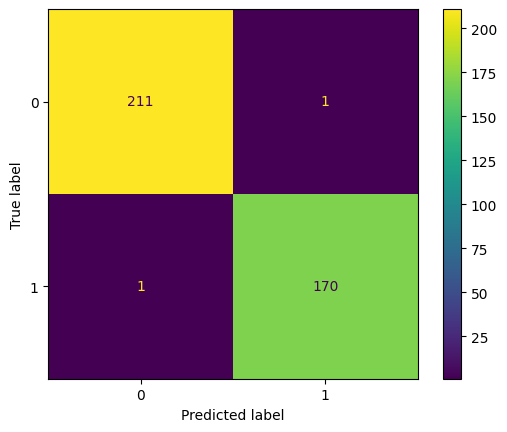

--------------------------------------------------
Test Accuracy : 0.7395833333333334
Test Confusion Matrix:


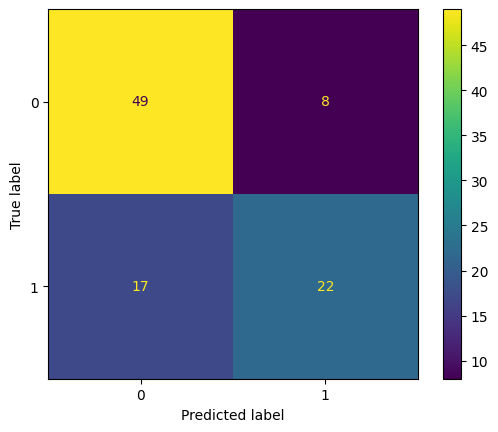

In [391]:
# Create Random Forest classifer object 
clf_rf = RandomForestClassifier(random_state=0)

# Train Decision Tree Classifer
clf_rf = clf_rf.fit(X_train,y_train)
scores3 = cross_val_score(clf_rf, X_train,y_train, cv=5)

#Predict the response for test dataset
y_pred3 = clf_rf.predict(X_test)

# Model Accuracy
evaluate_model(clf_rf)

In [392]:
param_rand_rf = {'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
# Instantiate the grid search model
# grid_search = GridSearchCV(estimator=clf_grid, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

random_search2 = RandomizedSearchCV(clf_rf,param_rand_rf, cv=10, scoring = "accuracy")

In [393]:
random_search2.fit(X_train, y_train)

/Users/arvindyadav/miniconda3/envs/Amrata/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/arvindyadav/miniconda3/envs/Amrata/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arvindyadav/miniconda3/envs/Amrata/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/arvindyadav/miniconda3/envs/Amrata/lib/python3.8/site-packages/sklearn/base.py", line 637

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='accuracy')

In [395]:
print("Tuned Decision Tree Parameters: {}".format(random_search2.best_params_))
print("Best score is {}".format(random_search2.best_score_))

Tuned Decision Tree Parameters: {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 6, 'bootstrap': False}
Best score is 0.7621457489878543


Train Accuracy : 0.8798955613577023
Train Confusion Matrix:


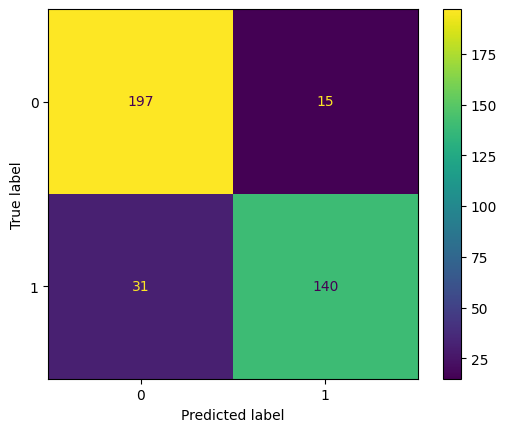

--------------------------------------------------
Test Accuracy : 0.7395833333333334
Test Confusion Matrix:


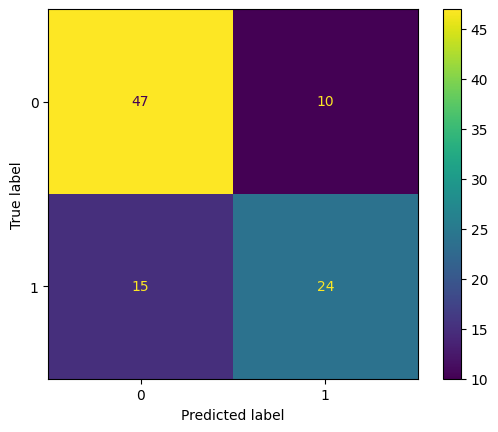

In [396]:
rf_best = random_search2.best_estimator_
evaluate_model(rf_best)

In [415]:
from sklearn import ensemble

In [436]:
xgb_params = {
    "n_estimators": 1200,
    "max_depth":3 ,
    'max_features': 3,
    "min_samples_split": 5,
    'min_samples_leaf': 6,
    "learning_rate": .1,
}

In [437]:
xgb_clf = ensemble.GradientBoostingClassifier(**xgb_params,random_state=1)
xgb_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_features=3, min_samples_leaf=6,
                           min_samples_split=5, n_estimators=1200,
                           random_state=1)

Train Accuracy : 0.9947780678851175
Train Confusion Matrix:


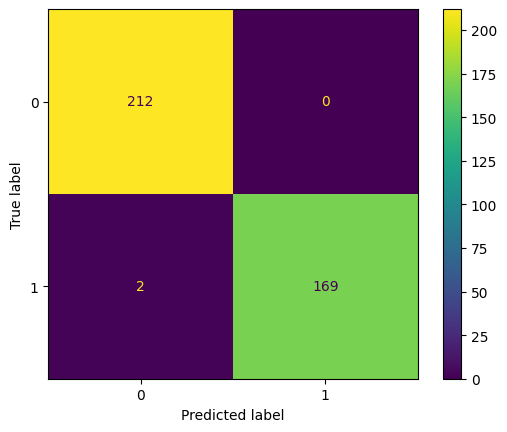

--------------------------------------------------
Test Accuracy : 0.7604166666666666
Test Confusion Matrix:


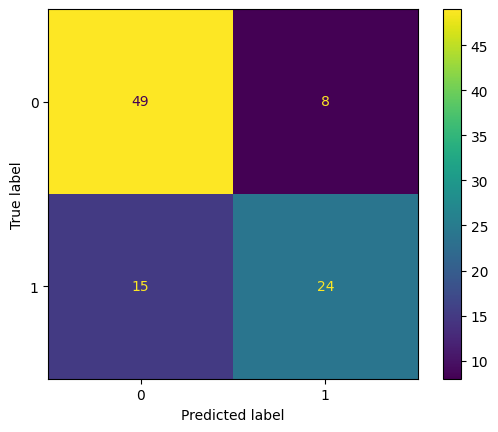

In [438]:
evaluate_model(xgb_clf)

In [ ]:
#### Inference

In [440]:
sample_format=pd.read_csv('./../../data/kidney_stone_pred/sample_submission.csv')

In [441]:
sample_format.head()

,id,target
0,414,0.5
1,415,0.5
2,416,0.5
3,417,0.5
4,418,0.5


In [442]:
test_df.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], dtype='object')

In [443]:
test_df1 = test_df[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]

In [444]:
test_df1_id = test_df['id'].to_list()

In [445]:
test_pred = list(xgb_clf.predict(test_df1))

In [446]:
out_df = pd.DataFrame(list(zip(test_df1_id, test_pred)), columns = ['id', 'target'])

In [447]:
out_df.to_csv("kidney_stone_pred_xgb_clf_v1.csv", index=False)

In [448]:
######### RF Inference 
test_pred_rf = list(rf_best.predict(test_df1))
out_df = pd.DataFrame(list(zip(test_df1_id, test_pred_rf)), columns = ['id', 'target'])
out_df.to_csv("kidney_stone_pred_rf_clf_v1.csv", index=False)

In [449]:
######### Best Decision Tree Inference 
test_pred_dt = list(dt_best.predict(test_df1))
out_df = pd.DataFrame(list(zip(test_df1_id, test_pred_dt)), columns = ['id', 'target'])
out_df.to_csv("kidney_stone_pred_dt_clf_v1.csv", index=False)